# <center>Artificial Intelligence </center>
### <center>CA5</center>
### <center>Nilufar Mohammadi</center>
### <center>810196687</center>

# Project Goal 

The goal of this project is to implement our own feedforward neural network and use it for Hiragana alphabet character classification.Classification takes place on 20 set of classes.

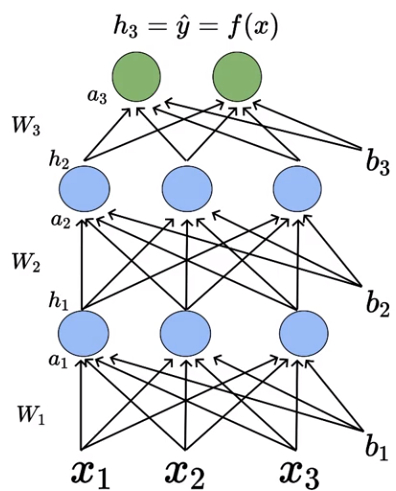

In [2]:
from IPython import display
display.Image("C:\\Users\\Ontime\\Desktop\\a.jpg")

For us to be able to test the accuracy of our model we use train and test data given to us in a KMNIST database.It contains images with their labels from the 20 main Japanese hiragana character groups.We use numpy and pandas library in order to achieve this end.

### Import Libraries

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
train_images = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\train_images.csv",header=None).to_numpy()
train_labels = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\train_labels.csv",header=None).to_numpy()-1 

test_images = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\test_images.csv",header=None).to_numpy()
test_labels = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\test_labels.csv",header=None).to_numpy()-1

print("train_images.shape =", train_images.shape, "\ntrain_labels.shape =", train_labels.shape, "\ntest_images.shape =", test_images.shape, "\ntest_labels.shape =", test_labels.shape)

train_images.shape = (60001, 785) 
train_labels.shape = (60001, 2) 
test_images.shape = (15001, 785) 
test_labels.shape = (15001, 2)


### Read Input

We use pandas "read_csv" function to save our data in a dataframe.Next,we turn the dataset into numpy arrays for later usage.Then we can print the dimensions of train and test data.

Our train images dataset contains 6000 (28*28 pixels) images.For demonstrating the image of each class we can use the below code.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total

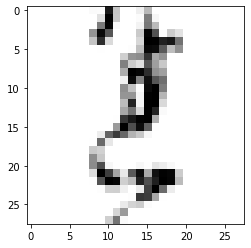

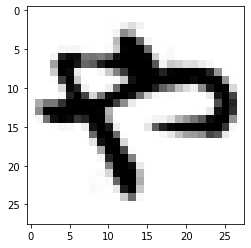

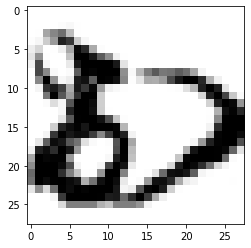

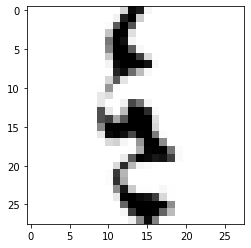

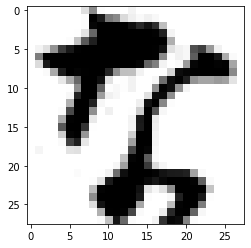

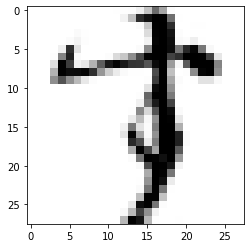

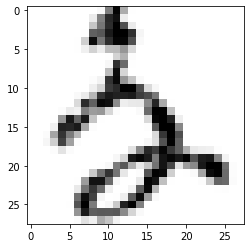

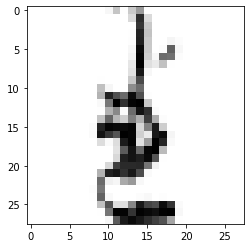

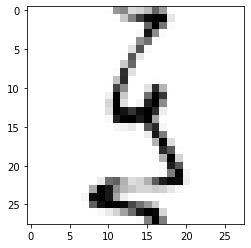

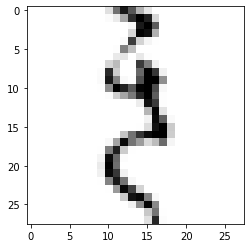

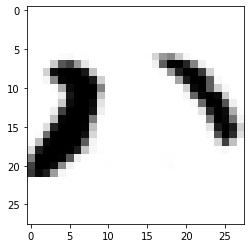

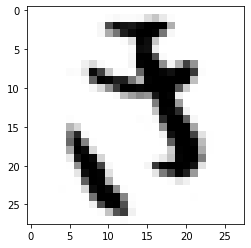

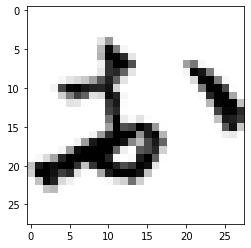

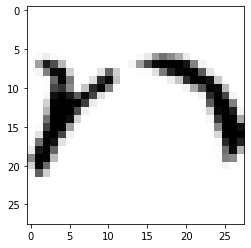

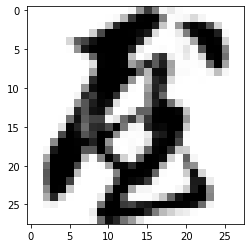

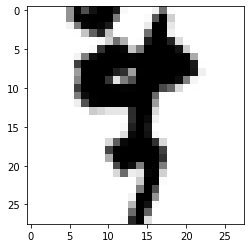

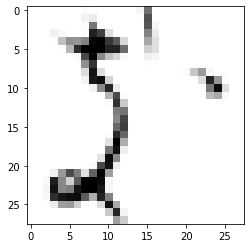

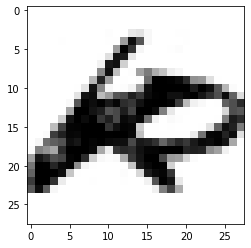

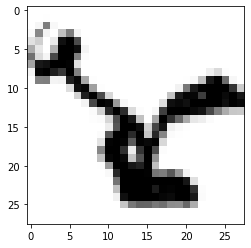

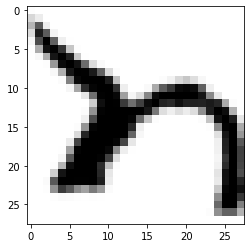

In [130]:
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 # width and length
no_of_different_labels =20 
image_pixels = image_size * image_size
data_path = "C:\\Users\\Ontime\\Desktop\\dataset\\"
train_data = np.loadtxt(data_path + "train_images.csv"  , delimiter=",", skiprows=1)
test_data = np.loadtxt(data_path + "test_images.csv",  delimiter=",", skiprows=1) 
# test_data[:10]
for i in range(20):
    img = train_images[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

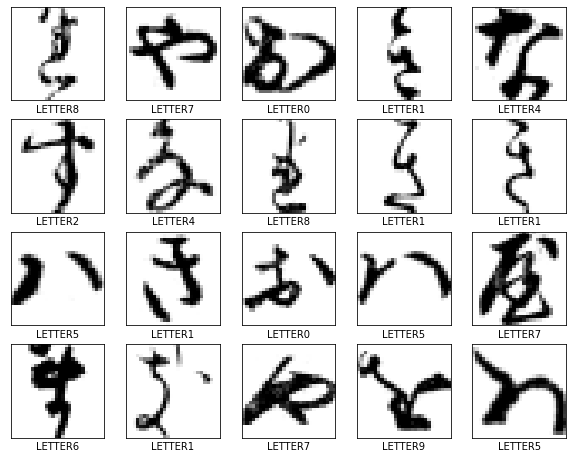

In [148]:
class_names = ['LETTER0', 'LETTER1', 'LETTER2', 'LETTER3', 'LETTER4',
               'LETTER5', 'LETTER6', 'LETTER7', 'LETTER8', 'LETTER9','LETTER10','LETTER11','LETTER12','LETTER13','LETTER14','LETTER15','LETTER16','LETTER17','LETTER18','LETTER19']
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [8]:
import pandas as pd
train_label = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\test_labels.csv",header=None)
train_label.iloc[:,1].value_counts().sort_index()

0     845
1     862
2     856
3     107
4     871
5     855
6     846
7     852
8     649
9     856
10    855
11    837
12    851
13    587
14    532
15    854
16    355
17    843
18    850
19    838
Name: 1, dtype: int64

<AxesSubplot:>

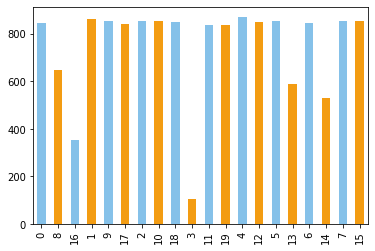

In [9]:
train_label = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\test_labels.csv",header=None)
train_label.iloc[:,1].value_counts().sort_index()
train_label[0].fillna(0)
train_label.iloc[:,1].value_counts(sort=False).plot.bar(color=['#85C1E9', '#F39C12'])


In [164]:
train_label = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\train_labels.csv",header=None)
train_label.iloc[:,1].value_counts().sort_index()


0     3427
1     3344
2     3432
3      440
4     3418
5     3358
6     3354
7     3412
8     2681
9     3357
10    3398
11    3444
12    3363
13    2417
14    2209
15    3356
16    1405
17    3409
18    3389
19    3388
Name: 1, dtype: int64

<AxesSubplot:>

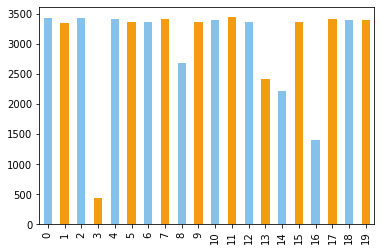

In [10]:
import  pandas as pd
test_label = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\train_labels.csv",header=None)
test_label.iloc[:,1].value_counts().sort_index()
test_label[0].fillna(0)
test_label.iloc[:,1].value_counts(sort=False).plot.bar(color=['#85C1E9', '#F39C12'])

Pixel values are often unsigned integers in the range between 0 and 255. Although these pixel values can be presented directly to neural network models in their raw format, this can result in challenges during modeling, such as in the slower than expected training of the model.Instead, there can be great benefit in preparing the image pixel values prior to modeling, such as simply scaling pixel values to the range 0-1 to centering and even standardizing the values.Scaling data to the range of 0-1 is traditionally referred to as normalization.Normalizing the data generally speeds up learning and leads to faster convergence. we scale the intensities within [0,1] to prevent early saturation of non-linear activation function output. 

In [11]:
import numpy as np
import pandas as pd

train_images = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\train_images.csv",header=None).to_numpy()
test_images = pd.read_csv("C:\\Users\\Ontime\\Desktop\\dataset\\test_images.csv",header=None).to_numpy()

#Data Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

# Dataloader

In [12]:
import numpy as np
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        # convert labels Dataframe into 'int64' type
        labels = labels.astype(int)
        #unique, inverse = np.unique(labels, return_inverse=True)
        #onehot_vectors = np.eye(n_classes)(unique.shape[0])[inverse]
        
        
        onehot_vectors = 1- (labels[:,None] != np.arange(n_classes)).astype(int)
        print(onehot_vectors)
        return onehot_vectors
    
    def __shuffle_dataset(self):
        #SOURCE: https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
        c = np.c_[self.__data.reshape(len(self.__data), -1), self.__onehot_labels.reshape(len(self.__onehot_labels), -1)]
        np.random.shuffle(c)
        data2 = c[:, :self.__data.size//len(self.__data)].reshape(self.__data.shape)
        self.__onehot_labels = c[:, self.__data.size//len(self.__data):].reshape(self.__onehot_labels.shape)
        self.__data = data2

        
        
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

In [13]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        relu_value = np.maximum(temp, 0)
        return relu_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        relu_derivative = np.where(temp>0, 1 , 0)
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_value = np.where(temp > 0, temp, temp * 0.01)
        return leacky_relu_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_derivative = np.where(temp > 0, 1,  0.010)
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        sigmoid_value = (1/(1 + np.exp(-temp)))
        return sigmoid_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        sigmoid_derivative = self.__val(temp)*(1-self.__val(temp))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    def __init__(self,matrix): 
        pass
    def __val(self):
        temp = np.matrix(x, dtype=float)
        softmax_value = np.exp(temp)/np.sum(np.exp(temp))
        return softmax_value

    
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        tanh_value = (2/(1 + np.exp(-2*temp)))-1
        return tanh_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        tanh_derivative = 1 - np.power(self.__val(temp), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

# Loss Function

In [14]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
  
        cross_entropy_value = np.mean(expected_val * np.log(true_val.T + 1e-8))
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        true_val = true_val.clip(min=1e-8,max=None)
        cross_entropy_derivative = np.where(expected_val==1,-1/true_val, 0)
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

# Layer

In [15]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
        
        
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        #print(np.size(self.__weight,0))
        #print( np.size(layer_input,1))
        #assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        
        self.__last_input = layer_input
        self.__last_activation_input  = np.dot(self.__last_input, self.__weight) + self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_output)
        return self.__last_activation_output

    def update_weights(self, backprop_tensor, lr):
#         assert np.ndim(backprop_tensor)==2
#         assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
#         assert np.size(backprop_tensor,1) == self.__n_neurons
        
        def backward(self,grad):
        
            backprop_tensor = np.dot(backprop_tensor, self.__weight.T)
            self.__weight = np.dot(self.__last_input.T,backprop_tensor)
            self.__bias = backprop_tensor.mean(axis=0)*self.__last_input.shape[0]
            self.__weight = self.__weight - lr * self.__weight
            self.__bias = self.__bias - lr * self.__bias
            return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.random.uniform(low, high=high, size=(dim1,dim2))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.random.normal(loc=mean, scale=var, size=(dim1, dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [ ]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):

        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        network_output = network_input
        N = len(self.__layers_list)
        
        for layer in range(N):
            self.__layers_list[layer] = m
            network_output = m.forward(network_output)
            if layer == (N-2):
                self.__before_last = network_output
        return network_output

    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(100000*average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(10*average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(10*average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        output = self.forward(x_batch)
        self.__update_weights(output, y_batch)
        batch_accuracy = self.__compute_accuracy(output, y_batch)
        batch_average_loss = np.mean(self.__loss(output, y_batch))
      
        return (batch_accuracy, batch_average_loss)
   
    def __test_on_batch(self, x_batch, y_batch):
        output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(output, y_batch)
        batch_average_loss = np.mean(self.__loss(output, y_batch))

        return (batch_accuracy, batch_average_loss)  
    
        
    def __get_labels(self, outputs):
        labels =  np.argmax(outputs,axis=1)
        return labels
    
    def __compute_accuracy(self, output, expected_output):
        x = output.shape[0]

        pred_labels = [] 
        for row in self.__get_labels(output):
            pred_labels.append(np.argmax(row))

        num_correct = 0
        for i in range(len(pred_labels)):
            if pred_labels[i].any() == self.__get_labels(expected_output)[i].any():
                num_correct += 1
                #len(self.__get_labels(expected_output))
        accuracy = 100*(num_correct / x)
        return accuracy

    
    def __update_weights(self, output, y_train):
        lr = self.__lr
        dm = self.__loss.derivative
        dx = dm(output, y_train)
        N = len(self.__layers_list)
        for x in reversed(range(0,N)):
            m = self.__layers_list[x]
            if x == (N - 1): 
                backprop_tensor = m.update_weights(dx, lr)
                backprop_tensor = m.update_weights(dx, lr)
            else:
                backprop_tensor = m.update_weights(backprop_tensor, lr)
                backprop_tensor = m.update_weights(backprop_tensor, lr)


In [17]:
# Training Sample Code
data_path = "C:\\Users\\Ontime\\Desktop\\dataset\\"
train_images_data = np.loadtxt(data_path + "train_images.csv"  , delimiter=",")
test_images_data = np.loadtxt(data_path + "test_images.csv",  delimiter=",") 
train_labels_data = np.loadtxt(data_path + "train_labels.csv",  delimiter=",",usecols = 1) 
test_labels_data = np.loadtxt(data_path + "test_labels.csv",  delimiter=",",usecols = 1) 
train_images_data = train_images_data / 255.0
test_images_data = test_images_data / 255.0

In [19]:
# Sample code for building and training a model
INPUT_SHAPE = 785
LEARNING_RATE = 1
EPOCHS = 20
BATCH_SIZE = 64

#print(train_images_data.shape)
#print(train_labels_data.shape)

TRAINLOADER = Dataloader(train_images_data, train_labels_data, 20, BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(test_images_data, test_labels_data, 20, BATCH_SIZE, shuffle=True)


network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Epoch 1:
	Train: Average Accuracy: 57.13316534212056	Average Loss: 1.1500149326693132
	Test: Average Accuracy: 56.49468085106383	Average Loss: 0.6895035620877308
Epoch 2:
	Train: Average Accuracy: 57.10186890224204	Average Loss: 1.1500156539500141
	Test: Average Accuracy: 56.49468085106383	Average Loss: 0.6898543009275219
Epoch 3:
	Train: Average Accuracy: 57.10186890224204	Average Loss: 1.1500191540231788
	Test: Average Accuracy: 56.390957446808514	Average Loss: 0.6895705432710463
Epoch 4:
	Train: Average Accuracy: 57.13316534212056	Average Loss: 1.1500248275523948
	Test: Average Accuracy: 56.28723404255319	Average Loss: 0.6895082420105975
Epoch 5:
	Train: Average Accuracy: 57.117517122181305	Average Loss: 1.1500249270485103
	Test: Average Accuracy:

### Zero weight initialization

If all the weights are initialized with 0, the derivative with respect to loss function is the same for every w in W[l], thus all weights have the same value in subsequent iterations. 

### Effect of learning rate 

The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.In this neural network training ,0.01 was the most effective learning rate.when we change the learning rate to numbers less than 0.1 , training will progress very slowly becausewe are making tiny updates to the weights of the network. But when we change the learning rate numbers higher that 10, we see divergent behavior in our loss function

### The Optimal Activation function

the optimal activation function used wasRelu and LeakyRelu.In some way LeakyRelu acts higly effective than Relu In two ways.first It fixes the “dying ReLU” problem, because leakyRelu doesn't have zero-slope parts. LeakyRelU also speeds up training.

### Problem with tanh and sigmoid Activation functions

the most important disadvantage of working with tanh and sigmoid is that they saturate. meaning that large values snap to 1.0 and small values snap to -1 or 0 for tanh and sigmoid.the functions are only sensitive to changes around their mid-point of their input i.e. 0.5 for sigmoid and 0 for tanh.

In [18]:
# Sample code for building and training a model
INPUT_SHAPE = 785
LEARNING_RATE = 1
EPOCHS = 20
BATCH_SIZE = 16

#print(train_images_data.shape)
#print(train_labels_data.shape)

TRAINLOADER = Dataloader(train_images_data, train_labels_data, 20, BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(test_images_data, test_labels_data, 20, BATCH_SIZE, shuffle=True)


network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Epoch 1:
	Train: Average Accuracy: 57.10143961610237	Average Loss: 1.2529972558621518
	Test: Average Accuracy: 56.303304904051174	Average Loss: 0.739626066537408
Epoch 2:
	Train: Average Accuracy: 57.10143961610237	Average Loss: 1.2527143989562715
	Test: Average Accuracy: 56.303304904051174	Average Loss: 0.739719485892446
Epoch 3:
	Train: Average Accuracy: 57.10143961610237	Average Loss: 1.2529664117275119
	Test: Average Accuracy: 56.35512911632315	Average Loss: 0.7396543787390857
Epoch 4:
	Train: Average Accuracy: 57.10143961610237	Average Loss: 1.2528820454577323
	Test: Average Accuracy: 56.40695332859512	Average Loss: 0.7396065677080644
Epoch 5:
	Train: Average Accuracy: 57.10143961610237	Average Loss: 1.2525944471903914
	Test: Average Accuracy: 5

In [20]:
# Sample code for building and training a model
INPUT_SHAPE = 785
LEARNING_RATE = 0.1
EPOCHS = 20
BATCH_SIZE = 32

#print(train_images_data.shape)
#print(train_labels_data.shape)

TRAINLOADER = Dataloader(train_images_data, train_labels_data, 20, BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(test_images_data, test_labels_data, 20, BATCH_SIZE, shuffle=True)


network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Epoch 1:
	Train: Average Accuracy: 57.08622068230277	Average Loss: 1.1560384448563488
	Test: Average Accuracy: 56.303304904051174	Average Loss: 0.702131579234207
Epoch 2:
	Train: Average Accuracy: 57.08622068230277	Average Loss: 1.155535783790282
	Test: Average Accuracy: 56.34061833688699	Average Loss: 0.7022179977036914
Epoch 3:
	Train: Average Accuracy: 57.08622068230277	Average Loss: 1.1556726191663909
	Test: Average Accuracy: 56.32196162046908	Average Loss: 0.7021612965373352
Epoch 4:
	Train: Average Accuracy: 57.08622068230277	Average Loss: 1.155825975209221
	Test: Average Accuracy: 56.32196162046908	Average Loss: 0.7022142302940941
Epoch 5:
	Train: Average Accuracy: 57.08622068230277	Average Loss: 1.1555812464707895
	Test: Average Accuracy: 56.

In [ ]:
# Sample code for building and training a model
INPUT_SHAPE = 785
LEARNING_RATE = 0.1
EPOCHS = 20
BATCH_SIZE = 32

#print(train_images_data.shape)
#print(train_labels_data.shape)

TRAINLOADER = Dataloader(train_images_data, train_labels_data, 20, BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(test_images_data, test_labels_data, 20, BATCH_SIZE, shuffle=True)


network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Epoch 1:


### Why we Use batches in Training a model

The reason why we use batches in neural network training is that batches need less memory. because er train the network with less samples, the training procedure needs less memory.Second reason is that networks have a faster training procedure with batches. because we update weights after each propagation. Disadvantages of using batches is that for smaller batch size the accuracy of gradient will lessen. 

### Why we use different epochs ?

The reason whywe use different number of epochs is thatwe want to have a better performance on non-training data.

### Is having more epochs better?

we should say that the number of epochs is not really important. the important thing is the validation and training error. As long as these two error keeps dropping, training should continue. For instance, if the validation error starts increasing that might be an indication of overfitting

### Then what should we do?

instead of increasing the number of epochs we use a test data set and monitor the test accuracy during training.

### What we learned in This CA!

the End was that we know how to design our own neural network only using numpy and a dataset.We also know how to test this neural network and manipulate it.It was Fun.